In [ ]:
# Install RDKit.
# %%capture
!pip install rdkit-pypi

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/Heteroaromatics.xlsx')

In [ ]:
df

# **Generating molecular objects from SMILES**

In [ ]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')

In [ ]:
df

# **Morgan Fingerprint**

In [35]:
df_mf = []
for mol in df['mol']:
  mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits = 2048)
  arr = np.zeros((0,), dtype=np.int8)
  # convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(mf_bitvector,arr)
  df_mf.append(arr)

MF = pd.concat([df, pd.DataFrame(df_mf)], axis=1)

In [36]:
MF.head()

,Smiles,mol,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dada80>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dada10>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dadb60>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dadfc0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dae180>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


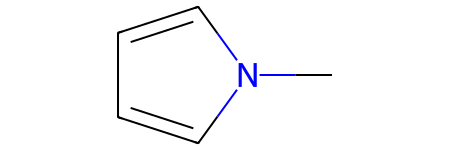

No of ones in the N-Methyl pyrrole MF are:  7
No of zeros in the N-Methyl pyrrole MF are:  2041 

935     1
950     1
1057    1
1088    1
1101    1
1145    1
1873    1
Name: 0, dtype: object


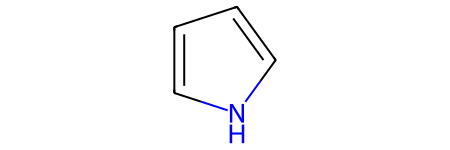

No of ones in the pyrrole MF are:  5
No of zeros in the pyrrole MF are:  2043 

1088    1
1114    1
1145    1
1506    1
1873    1
Name: 1, dtype: object


In [37]:
# print first molecule in the dataset
display(MF.iloc[0,1])
nmpyrrole = MF.iloc[0,2:]

# get the number of ones and zeros in the first molecule
print(f'No of ones in the N-Methyl pyrrole MF are:  {nmpyrrole[nmpyrrole==1].count()}')
print(f'No of zeros in the N-Methyl pyrrole MF are:  {nmpyrrole[nmpyrrole==0].count()} \n')

# grab the column names where bits are 1s
print(nmpyrrole[nmpyrrole==1])

# print second molecule in the dataset
display(MF.iloc[1,1])
pyrrole = MF.iloc[1,2:]

# get the number of ones and zeros in the second molecule
print(f'No of ones in the pyrrole MF are:  {nmpyrrole[pyrrole==1].count()}')
print(f'No of zeros in the pyrrole MF are:  {nmpyrrole[pyrrole==0].count()} \n')

# get the column names where bits are 1s
print(pyrrole[pyrrole==1])

# **Extended Connectivity Circular Fingerprint (ECFP)**

In [32]:
df_ecfp = []
for mol in df['mol']:
  ecfp_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048)
  arr = np.zeros((0,), dtype=np.int8)
  # convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(ecfp_bitvector,arr)
  df_ecfp.append(arr)

ECFP = pd.concat([df, pd.DataFrame(df_ecfp)], axis=1)

In [33]:
ECFP.head()

,Smiles,mol,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dada80>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dada10>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dadb60>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dadfc0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ad185dae180>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


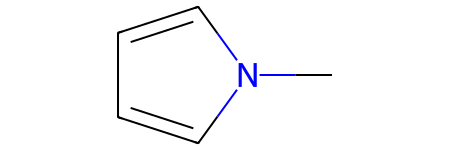

No of ones in the N-Methyl pyrrole ECFP are:  10
No of zeros in the N-Methyl pyrrole ECFP are:  2038 

384     1
637     1
935     1
950     1
1057    1
1088    1
1101    1
1145    1
1619    1
1873    1
Name: 0, dtype: object


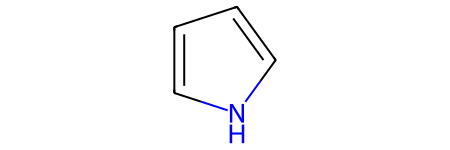

No of ones in the pyrrole ECFP are:  8
No of zeros in the pyrrole ECFP are:  2040 

80      1
939     1
1088    1
1114    1
1145    1
1506    1
1873    1
1908    1
Name: 1, dtype: object


In [34]:
# print first molecule in the dataset
display(ECFP.iloc[0,1])
nmpyrrole = ECFP.iloc[0,2:]

# get the number of ones and zeros in the first molecule
print(f'No of ones in the N-Methyl pyrrole ECFP are:  {nmpyrrole[nmpyrrole==1].count()}')
print(f'No of zeros in the N-Methyl pyrrole ECFP are:  {nmpyrrole[nmpyrrole==0].count()} \n')

# grab the column names where bits are 1s
print(nmpyrrole[nmpyrrole==1])

# print second molecule in the dataset
display(ECFP.iloc[1,1])
pyrrole = ECFP.iloc[1,2:]

# get the number of ones and zeros in the second molecule
print(f'No of ones in the pyrrole ECFP are:  {nmpyrrole[pyrrole==1].count()}')
print(f'No of zeros in the pyrrole ECFP are:  {nmpyrrole[pyrrole==0].count()} \n')

# get the column names where bits are 1s
print(pyrrole[pyrrole==1])